In [1]:
# To suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For displaying all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importing dataset

HousingDF = pd.read_csv('train.csv')
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking shape of the dataframe
HousingDF.shape

(1460, 81)

In [5]:
# Checking information
HousingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking summary of dataframe
HousingDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking null count
round(HousingDF.isnull().sum()/len(HousingDF.index),2).sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageType       0.06
GarageCond       0.06
GarageYrBlt      0.06
GarageFinish     0.06
GarageQual       0.06
BsmtFinType1     0.03
BsmtExposure     0.03
BsmtCond         0.03
BsmtQual         0.03
BsmtFinType2     0.03
MasVnrArea       0.01
MasVnrType       0.01
Exterior2nd      0.00
Exterior1st      0.00
OverallCond      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
SalePrice        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtFinSF1       0.00
HeatingQC 

Null values exist in various columns.

## Data Cleaning

In [8]:
# Checking for null values in all categorical columns
HousingDF.select_dtypes(include='object').isnull().sum()[HousingDF.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Imputing each categorical column one by one

In [9]:
# Imputing Nan in 'Alley' with 'No Alley Access'
HousingDF['Alley'].replace({np.nan:'No Alley Access'},inplace=True)
# Checking value count after imputation
100*(HousingDF['Alley'].value_counts()/HousingDF['Alley'].count())

No Alley Access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64

'Alley' column has 93.76% data as single value so we will remove this column as this would be skewed.

In [10]:
# Imputing Nan in 'MasVnrType' with 'None'
HousingDF['MasVnrType'].replace({np.nan:'None'},inplace=True)
# Checking value count after imputation
100*(HousingDF['MasVnrType'].value_counts()/HousingDF['MasVnrType'].count())

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [11]:
# Imputing Nan in 'BsmtQual' with 'NA'
HousingDF['BsmtQual'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['BsmtQual'].value_counts()/HousingDF['BsmtQual'].count())

TA    44.452055
Gd    42.328767
Ex     8.287671
NA     2.534247
Fa     2.397260
Name: BsmtQual, dtype: float64

In [12]:
# Imputing Nan in 'BsmtCond' with 'TA' - since it has more than 50% values as TA
HousingDF['BsmtCond'].replace({np.nan:'TA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['BsmtCond'].value_counts()/HousingDF['BsmtCond'].count())

TA    92.328767
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

In [13]:
# Imputing Nan in 'BsmtExposure' with 'No' - since it has more than 50% values as No
HousingDF['BsmtExposure'].replace({np.nan:'No'},inplace=True)
# Checking value count after imputation
100*(HousingDF['BsmtExposure'].value_counts()/HousingDF['BsmtExposure'].count())

No    67.876712
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [14]:
# Imputing Nan in 'BsmtFinType1' with 'NA'
HousingDF['BsmtFinType1'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['BsmtFinType1'].value_counts()/HousingDF['BsmtFinType1'].count())

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
NA      2.534247
Name: BsmtFinType1, dtype: float64

In [15]:
# Imputing Nan in 'BsmtFinType2' with 'Unf' - since it has more than 50% values as Unf
HousingDF['BsmtFinType2'].replace({np.nan:'Unf'},inplace=True)
# Checking value count after imputation
100*(HousingDF['BsmtFinType2'].value_counts()/HousingDF['BsmtFinType2'].count())

Unf    88.630137
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [16]:
# Imputing Nan in 'Electrical' with 'SBrkr' - since it has more than 50% values as SBrkr
HousingDF['Electrical'].replace({np.nan:'SBrkr'},inplace=True)
# Checking value count after imputation
100*(HousingDF['Electrical'].value_counts()/HousingDF['Electrical'].count())

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [17]:
# Imputing Nan in 'FireplaceQu' with 'NA'
HousingDF['FireplaceQu'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['FireplaceQu'].value_counts()/HousingDF['FireplaceQu'].count())

NA    47.260274
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [18]:
# Imputing Nan in 'GarageType' with 'Attchd' - since it has more than 50% values as Attchd
HousingDF['GarageType'].replace({np.nan:'Attchd'},inplace=True)
# Checking value count after imputation
100*(HousingDF['GarageType'].value_counts()/HousingDF['GarageType'].count())

Attchd     65.136986
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [19]:
# Imputing Nan in 'GarageFinish' with 'NA'
HousingDF['GarageFinish'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['GarageFinish'].value_counts()/HousingDF['GarageFinish'].count())

Unf    41.438356
RFn    28.904110
Fin    24.109589
NA      5.547945
Name: GarageFinish, dtype: float64

In [20]:
# Imputing Nan in 'GarageQual' with 'TA' - since it has more than 50% values as TA
HousingDF['GarageQual'].replace({np.nan:'TA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['GarageQual'].value_counts()/HousingDF['GarageQual'].count())

TA    95.342466
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

In [21]:
# Imputing Nan in 'GarageCond' with 'TA' - since it has more than 50% values as TA
HousingDF['GarageCond'].replace({np.nan:'TA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['GarageCond'].value_counts()/HousingDF['GarageCond'].count())

TA    96.369863
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [22]:
# Imputing Nan in 'PoolQC' with 'NA'
HousingDF['PoolQC'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['PoolQC'].value_counts()/HousingDF['PoolQC'].count())

NA    99.520548
Gd     0.205479
Ex     0.136986
Fa     0.136986
Name: PoolQC, dtype: float64

In [23]:
# Imputing Nan in 'Fence' with 'NA'
HousingDF['Fence'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['Fence'].value_counts()/HousingDF['Fence'].count())

NA       80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

In [24]:
# Imputing Nan in 'MiscFeature' with 'NA'
HousingDF['MiscFeature'].replace({np.nan:'NA'},inplace=True)
# Checking value count after imputation
100*(HousingDF['MiscFeature'].value_counts()/HousingDF['MiscFeature'].count())

NA      96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

In [25]:
# Dropping the columns which have more than 85% of skewed data
# 85% of 1460 = 1241

def getSkewedColumnsCategorical():
    columns = []
    categorical_columns = HousingDF.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(HousingDF[col].value_counts().max() >= 1241):
            columns.append(col)
    return columns

columnsToBeRemoved = getSkewedColumnsCategorical()
HousingDF.drop(columnsToBeRemoved, axis = 1, inplace = True)

HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,NA,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,NA,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,NA,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,NA,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,NA,0,12,2008,Normal,250000


In [26]:
# Checking the shape
HousingDF.shape

(1460, 60)

In [27]:
# Checking for null values in all categorical columns again
HousingDF.select_dtypes(include='object').isnull().sum()[HousingDF.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

Null Values are removed from categorical columns

In [28]:
# Checking null values in numerical columns
HousingDF.select_dtypes(include=['int64','float']).isnull().sum()[HousingDF.select_dtypes(include=['int64','float'])
                                                                  .isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [29]:
# Imputing the null values with median values for LotFrontage and MasVnrArea columns

HousingDF['LotFrontage'] = HousingDF['LotFrontage'].replace(np.nan, HousingDF['LotFrontage'].median())
HousingDF['MasVnrArea'] = HousingDF['MasVnrArea'].replace(np.nan, HousingDF['MasVnrArea'].median())

In [30]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further as this as an year column

HousingDF['GarageYrBlt'] = HousingDF['GarageYrBlt'].fillna(0)
HousingDF['GarageYrBlt'] = HousingDF['GarageYrBlt'].astype(int)

In [31]:
# Creating a new column 'AgeOfHouse' - This column would determine the age of the house in years by calculating the difference
# between 'YearBuilt' and current year -2021

def calculateAgeOfHouse(row):
    return 2021 - row['YearBuilt']
    
HousingDF['AgeOfHouse'] = HousingDF.apply(calculateAgeOfHouse, axis=1)
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,AgeOfHouse
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,Attchd,2003,RFn,2,548,0,61,0,0,0,0,NA,0,2,2008,Normal,208500,18
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,NA,0,5,2007,Normal,181500,45
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,NA,0,9,2008,Normal,223500,20
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,NA,0,2,2006,Abnorml,140000,106
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,NA,0,12,2008,Normal,250000,21


In [32]:
# Creating a new column 'IsHouseRemodelled' - This column would determine whether the house has been remodelled or not based on 
# the difference between 'YearBuilt' and 'YearRemodAdd' years

def checkIfHouseRemodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return -1
    
HousingDF['IsHouseRemodelled'] = HousingDF.apply(checkIfHouseRemodelled, axis=1)
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,AgeOfHouse,IsHouseRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,Attchd,2003,RFn,2,548,0,61,0,0,0,0,NA,0,2,2008,Normal,208500,18,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,NA,0,5,2007,Normal,181500,45,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,NA,0,9,2008,Normal,223500,20,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,NA,0,2,2006,Abnorml,140000,106,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,NA,0,12,2008,Normal,250000,21,0


In [33]:
# Creating a new column named 'BuiltOrRemodelledAge' for determining the age of the building at the time of selling

def getBuiltOrRemodelledAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
HousingDF['BuiltOrRemodelledAge'] = HousingDF.apply(getBuiltOrRemodelledAge, axis=1)
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,Attchd,2003,RFn,2,548,0,61,0,0,0,0,NA,0,2,2008,Normal,208500,18,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,NA,0,5,2007,Normal,181500,45,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,NA,0,9,2008,Normal,223500,20,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,NA,0,2,2006,Abnorml,140000,106,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,NA,0,12,2008,Normal,250000,21,0,8


In [34]:
# Creating a new column which would indicate if the Garage is old or new.
# GarageYrBlt less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def IsGarageOldOrNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
HousingDF['OldOrNewGarage'] = HousingDF['GarageYrBlt'].apply(IsGarageOldOrNew)
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,Attchd,2003,RFn,2,548,0,61,0,0,0,0,NA,0,2,2008,Normal,208500,18,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,NA,0,5,2007,Normal,181500,45,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,NA,0,9,2008,Normal,223500,20,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,NA,0,2,2006,Abnorml,140000,106,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,NA,0,12,2008,Normal,250000,21,0,8,1


In [35]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

HousingDF.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [36]:
# Checking the shape
HousingDF.shape

(1460, 60)

In [37]:
# Fetching all numeric (float and int) columns in a dataframe
HousingDF_numeric = HousingDF.select_dtypes(include=['float64', 'int64'])
HousingDF_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
0,1,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,18,0,5,1
1,2,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,45,0,31,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,20,1,6,1
3,4,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,106,1,36,0
4,5,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,21,0,8,1


In [38]:
HousingDF_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,49.732192,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,11.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,21.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,48.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,67.000000,1.000000,41.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,149.000000,1.000000,60.000000,1.000000


In [39]:
# Checking value count of each numeric column to check if data is skewed
# Removing ID from HousingDF_numeric
HousingDF_numeric = HousingDF_numeric.drop(['Id'],axis=1)
for col in (HousingDF_numeric):
    print("**********************")
    print("******" + col + "*****")
    print(100*(HousingDF_numeric[col].value_counts()/HousingDF_numeric[col].count()))
    print("**********************")

**********************
******MSSubClass*****
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
**********************
**********************
******LotFrontage*****
69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
75.0      3.630137
65.0      3.013699
85.0      2.739726
78.0      1.712329
90.0      1.575342
21.0      1.575342
68.0      1.301370
24.0      1.301370
64.0      1.301370
73.0      1.232877
63.0      1.164384
55.0      1.164384
79.0      1.164384
72.0      1.164384
100.0     1.095890
74.0      1.027397
66.0      1.027397
51.0      1.027397
52.0      0.958904
59.0      0.890411
40.0      0.821918
71.0      0.821918
43.0      0.821918
67.0      0.821918
82.0      0.821918
57.0      0.821918
76.0     

0       8.082192
728     0.616438
384     0.547945
572     0.479452
600     0.479452
300     0.479452
440     0.410959
625     0.410959
280     0.410959
672     0.410959
270     0.410959
162     0.342466
108     0.342466
490     0.342466
390     0.342466
80      0.342466
326     0.342466
816     0.342466
698     0.342466
319     0.342466
264     0.342466
216     0.342466
410     0.342466
638     0.273973
768     0.273973
780     0.273973
660     0.273973
420     0.273973
840     0.273973
556     0.273973
544     0.273973
536     0.273973
747     0.273973
684     0.273973
847     0.273973
350     0.273973
396     0.273973
186     0.273973
36      0.273973
88      0.273973
92      0.273973
100     0.273973
115     0.273973
125     0.273973
163     0.273973
168     0.273973
192     0.273973
392     0.273973
276     0.273973
284     0.273973
312     0.273973
324     0.273973
336     0.273973
340     0.273973
912     0.273973
360     0.273973
884     0.273973
611     0.273973
130     0.2054

Name: TotRmsAbvGrd, dtype: float64
**********************
**********************
******Fireplaces*****
0    47.260274
1    44.520548
2     7.876712
3     0.342466
Name: Fireplaces, dtype: float64
**********************
**********************
******GarageCars*****
2    56.438356
1    25.273973
3    12.397260
0     5.547945
4     0.342466
Name: GarageCars, dtype: float64
**********************
**********************
******GarageArea*****
0       5.547945
440     3.356164
576     3.219178
240     2.602740
484     2.328767
528     2.260274
288     1.849315
400     1.712329
480     1.643836
264     1.643836
308     1.369863
420     1.301370
280     1.095890
672     1.027397
216     0.821918
504     0.821918
336     0.821918
352     0.821918
360     0.753425
564     0.753425
300     0.684932
462     0.684932
572     0.684932
540     0.684932
539     0.616438
660     0.616438
180     0.616438
384     0.616438
312     0.616438
286     0.616438
520     0.547945
588     0.547945
550     0.547945

140000    1.369863
135000    1.164384
145000    0.958904
155000    0.958904
190000    0.890411
110000    0.890411
160000    0.821918
115000    0.821918
139000    0.753425
130000    0.753425
125000    0.684932
143000    0.684932
185000    0.684932
180000    0.684932
144000    0.684932
175000    0.616438
147000    0.616438
100000    0.616438
127000    0.616438
165000    0.547945
176000    0.547945
170000    0.547945
129000    0.547945
230000    0.547945
250000    0.547945
200000    0.547945
141000    0.547945
215000    0.547945
148000    0.479452
173000    0.479452
119000    0.479452
128000    0.479452
178000    0.479452
120000    0.479452
181000    0.479452
112000    0.479452
235000    0.479452
174000    0.479452
189000    0.410959
239000    0.410959
152000    0.410959
187500    0.410959
157000    0.410959
240000    0.410959
205000    0.410959
132000    0.410959
113000    0.410959
127500    0.410959
118000    0.410959
108000    0.410959
260000    0.410959
158000    0.410959
225000    0.

In [40]:
# As we know now there are columns with more than 85% of skewed data, hence removing those columns
# 85% of 1460 = 1241
# We will also drop MoSold as we will not be using that for further analysis

def getSkewedColumns():
    columns = []
    numerical_columns = HousingDF.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(HousingDF[col].value_counts().max() >= 1241):
            columns.append(col)
    return columns

columnsToBeRemoved = getSkewedColumns()
HousingDF.drop(columnsToBeRemoved, axis = 1, inplace = True)
HousingDF.drop(['MoSold'], axis = 1, inplace = True)
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NA,Attchd,RFn,2,548,0,61,NA,Normal,208500,18,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,NA,Normal,181500,45,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,NA,Normal,223500,20,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,NA,Abnorml,140000,106,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,NA,Normal,250000,21,0,8,1


In [41]:
# Checking for percentage of null values in each column again
print(round(100*(HousingDF.isnull().sum()/len(HousingDF.index)), 2))

Id                      0.0
MSSubClass              0.0
MSZoning                0.0
LotFrontage             0.0
LotArea                 0.0
LotShape                0.0
LotConfig               0.0
Neighborhood            0.0
BldgType                0.0
HouseStyle              0.0
OverallQual             0.0
OverallCond             0.0
RoofStyle               0.0
Exterior1st             0.0
Exterior2nd             0.0
MasVnrType              0.0
MasVnrArea              0.0
ExterQual               0.0
Foundation              0.0
BsmtQual                0.0
BsmtExposure            0.0
BsmtFinType1            0.0
BsmtFinSF1              0.0
BsmtUnfSF               0.0
TotalBsmtSF             0.0
HeatingQC               0.0
1stFlrSF                0.0
2ndFlrSF                0.0
GrLivArea               0.0
BsmtFullBath            0.0
FullBath                0.0
HalfBath                0.0
BedroomAbvGr            0.0
KitchenQual             0.0
TotRmsAbvGrd            0.0
Fireplaces          

In [42]:
# Checking if there are any duplicate values in the dataframe
HousingDF[HousingDF.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage


In [43]:
# Checking the shape again
HousingDF.shape

(1460, 50)

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above
HousingDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,49.732192,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.202904,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,11.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,21.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,48.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,67.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,96.100000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,105.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,121.820000,1.000000,60.000000,1.000000


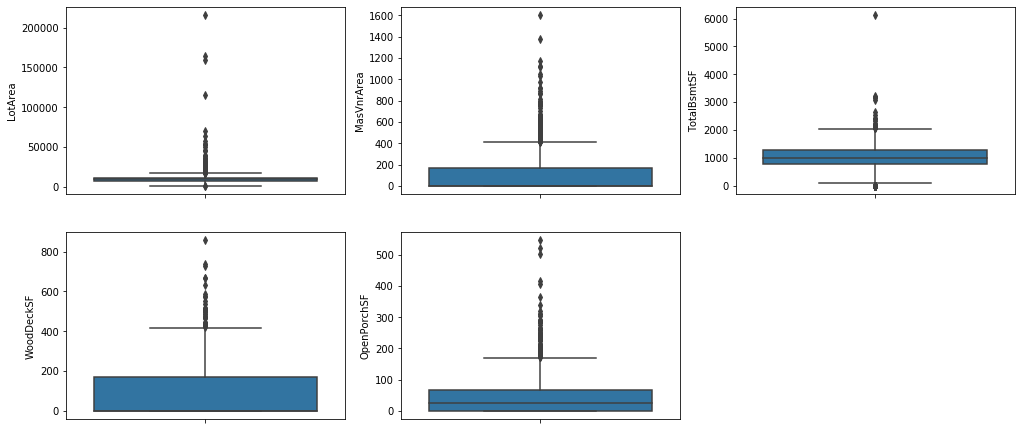

In [45]:
# Checking the outliers in the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = HousingDF)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = HousingDF)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = HousingDF)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = HousingDF)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = HousingDF)
plt.show()

In [46]:
# Removing Outliers - beyond 99%

q_LotArea = HousingDF['LotArea'].quantile(0.99)
HousingDF = HousingDF[HousingDF["LotArea"] < q_LotArea]

q_MasVnrArea = HousingDF['MasVnrArea'].quantile(0.99)
HousingDF = HousingDF[HousingDF["MasVnrArea"] < q_MasVnrArea]

q_TotalBsmtSF = HousingDF['TotalBsmtSF'].quantile(0.99)
HousingDF = HousingDF[HousingDF["TotalBsmtSF"] < q_TotalBsmtSF]

q_WoodDeckSF = HousingDF['WoodDeckSF'].quantile(0.99)
HousingDF = HousingDF[HousingDF["WoodDeckSF"] < q_WoodDeckSF]

q_OpenPorchSF = HousingDF['OpenPorchSF'].quantile(0.99)
HousingDF = HousingDF[HousingDF["OpenPorchSF"] < q_OpenPorchSF]

In [47]:
# Determining the percentage of data retained
num_data = round(100*(len(HousingDF)/1460),2)
print(num_data)

94.93


We have retained 94.93% of data.

## Data Visualisation

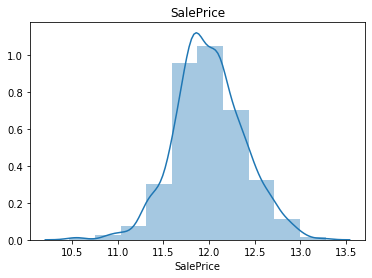

In [48]:
# Visualising the target variable -> SalePrice after transforming the sales price

HousingDF['SalePrice'] = np.log1p(HousingDF['SalePrice'])
plt.title('SalePrice')
sns.distplot(HousingDF['SalePrice'], bins=10)
plt.show()

The above plot depicts that 'SalePrice' variable is normally distributed.

<Figure size 720x360 with 0 Axes>

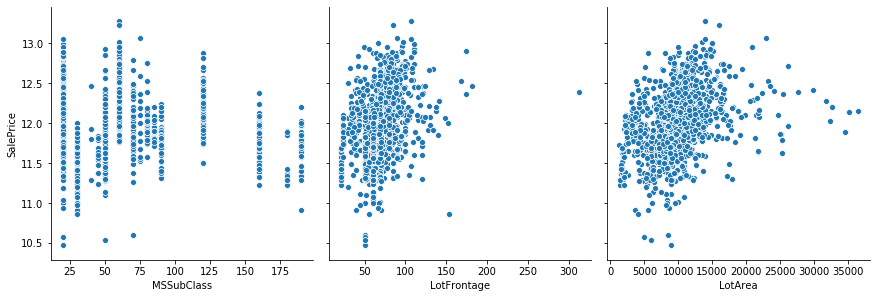

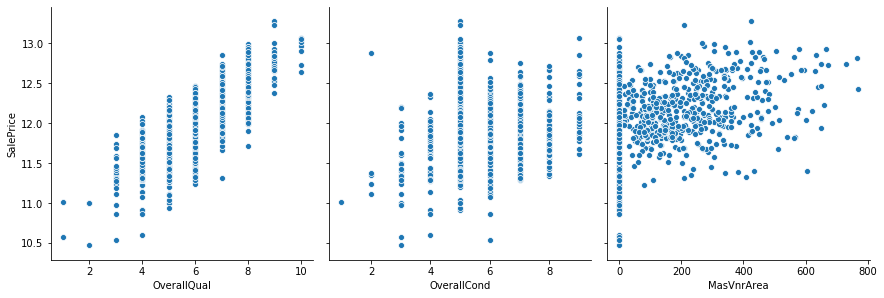

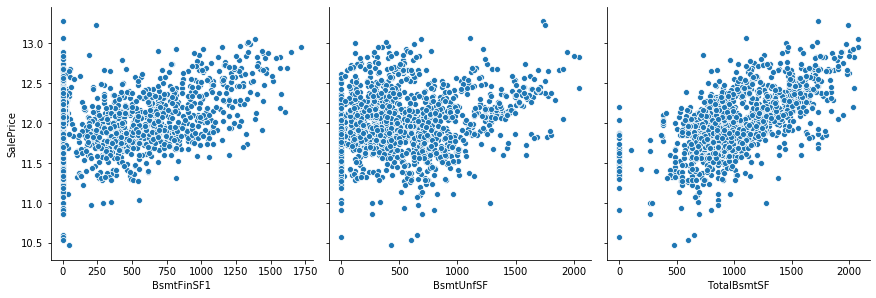

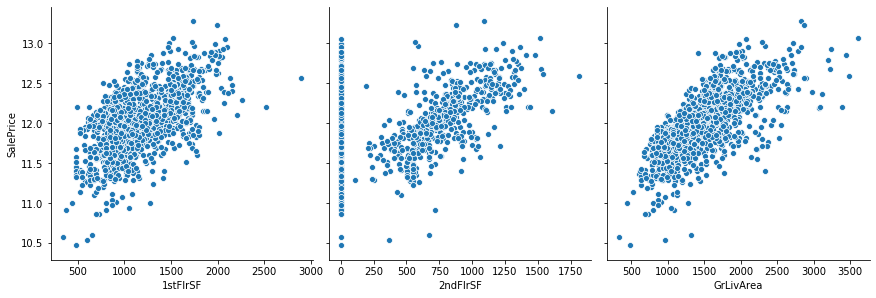

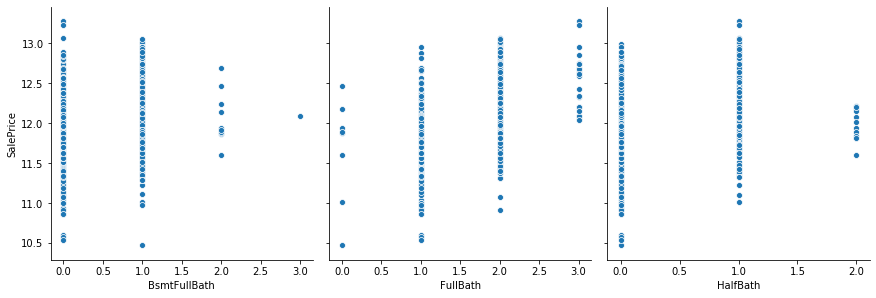

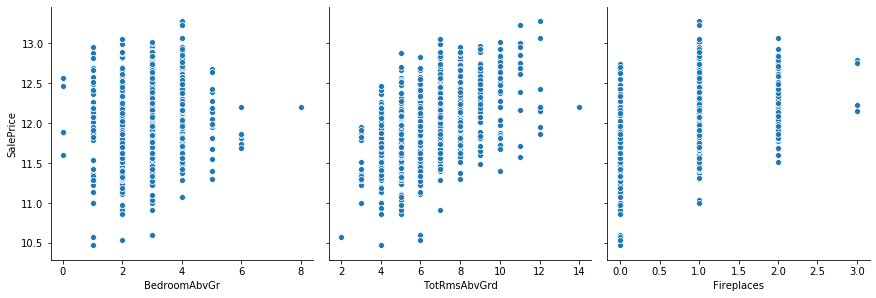

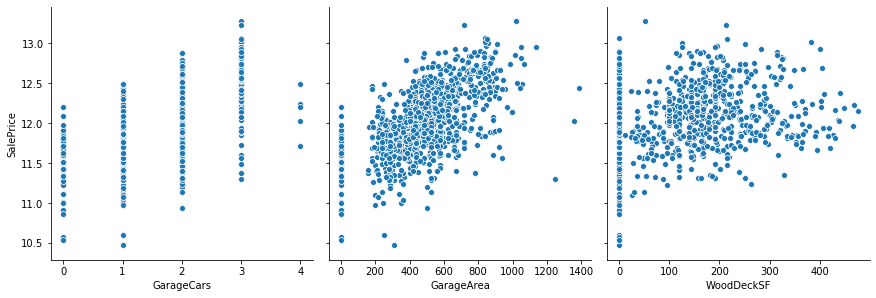

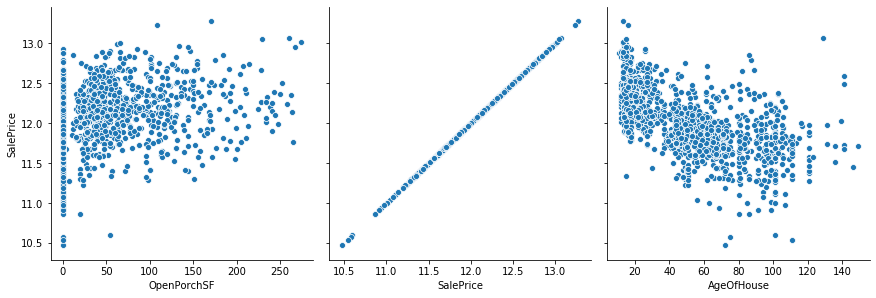

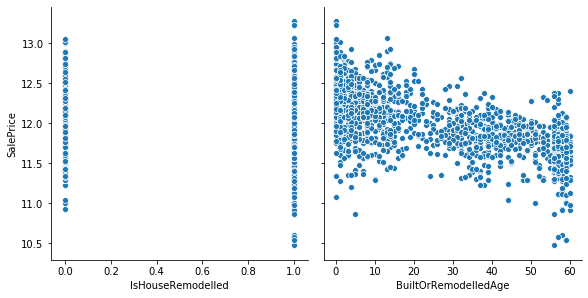

In [49]:
# Visualising numerical columns using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(HousingDF, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['OpenPorchSF','SalePrice','AgeOfHouse' ], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDF, x_vars=['IsHouseRemodelled','BuiltOrRemodelledAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

We can observe that '1stFlrSF', 'GrLivArea' seems to be showing correlation towards right.

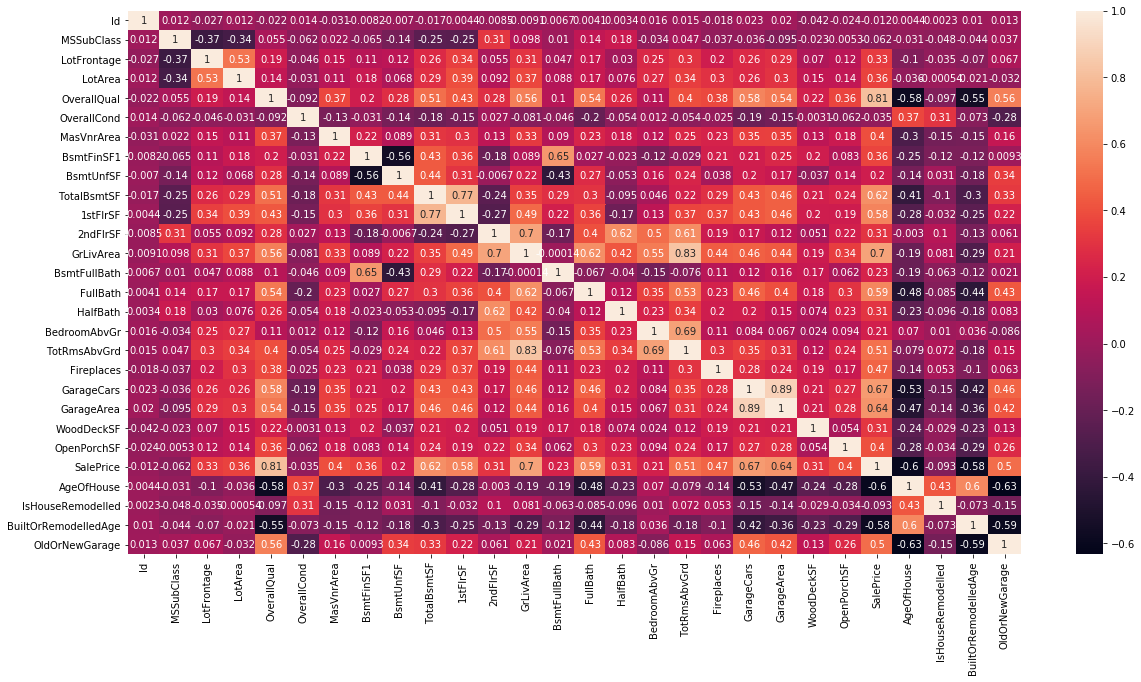

In [50]:
# Checking correlation matrix
plt.figure(figsize = (20, 10))
sns.heatmap(HousingDF.corr(), annot = True)
plt.show()

From the heatmap it is observed that below columns are highly correlated to each other:
- TotRmsAbvGrd and GrLivArea
- Garage Area and Garage Cars

In [51]:
# Hence dropping highly correlated variables
HousingDF.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [52]:
# Checking th shape again
HousingDF.shape

(1386, 48)

## Data Preparation

In [53]:
# Converting categorical columns into numeric
# Data which can be sequenced, considering an ordered sequence value for them
# Data which cannot be sequenced and can be reduced as binary, categorising them into 0 and 1

HousingDF['c_LotShape'] = HousingDF['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
HousingDF['c_ExterQual'] = HousingDF['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
HousingDF['c_BsmtQual'] = HousingDF['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
HousingDF['c_BsmtExposure'] = HousingDF['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
HousingDF['c_BsmtFinType1'] = HousingDF['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 
                                                             'Unf': 1, 'NA': 0})
HousingDF['c_HeatingQC'] = HousingDF['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
HousingDF['c_KitchenQual'] = HousingDF['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
HousingDF['c_FireplaceQu'] = HousingDF['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
HousingDF['c_GarageFinish'] = HousingDF['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0 })
HousingDF['c_BldgType'] = HousingDF['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1})
HousingDF['c_HouseStyle'] = HousingDF['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, 
                                                         '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'NA': 0})
HousingDF['c_Fence'] = HousingDF['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'NA': 0 })
HousingDF['c_LotConfig'] = HousingDF['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1})
HousingDF['c_MasVnrType'] = HousingDF['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
HousingDF['c_SaleCondition'] = HousingDF['SaleCondition'].map({'Normal': 1, 'Partial': 1, 
                                                               'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0})
HousingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage,c_LotShape,c_ExterQual,c_BsmtQual,c_BsmtExposure,c_BsmtFinType1,c_HeatingQC,c_KitchenQual,c_FireplaceQu,c_GarageFinish,c_BldgType,c_HouseStyle,c_Fence,c_LotConfig,c_MasVnrType,c_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,NA,Attchd,RFn,2,0,61,NA,Normal,12.247699,18,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,NA,Normal,12.109016,45,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,NA,Normal,12.317171,20,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,NA,Abnorml,11.849405,106,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,NA,Normal,12.429220,21,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [54]:
# Checking shape again
HousingDF.shape

(1386, 63)

In [55]:
# Dropping the old columns from which the new columns are created
# Also dropping the 'Id' column as it will not be used any more

HousingDF = HousingDF.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

In [56]:
# Checking shape again
HousingDF.shape

(1386, 47)

In [57]:
# Creating dummies for below columns:

# 1. MSZoning
c_MSZoning = pd.get_dummies(HousingDF['MSZoning'], prefix='MSZoning', drop_first = True)
HousingDF = pd.concat([HousingDF, c_MSZoning], axis = 1)

# 2. Neighborhood
c_Neighborhood = pd.get_dummies(HousingDF['Neighborhood'], prefix='Neighborhood', drop_first = True)
HousingDF = pd.concat([HousingDF, c_Neighborhood], axis = 1)

# 3. RoofStyle
c_RoofStyle = pd.get_dummies(HousingDF['RoofStyle'], prefix='RoofStyle', drop_first = True)
HousingDF = pd.concat([HousingDF, c_RoofStyle], axis = 1)

# 4. Exterior1st
c_Exterior1st = pd.get_dummies(HousingDF['Exterior1st'], prefix='Exterior1st', drop_first = True)
HousingDF = pd.concat([HousingDF, c_Exterior1st], axis = 1)

# 5. Exterior2nd
c_Exterior2nd = pd.get_dummies(HousingDF['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
HousingDF = pd.concat([HousingDF, c_Exterior2nd], axis = 1)

# 6. Foundation
c_Foundation = pd.get_dummies(HousingDF['Foundation'], prefix='Foundation', drop_first = True)
HousingDF = pd.concat([HousingDF, c_Foundation], axis = 1)

# 7. GarageType
c_GarageType = pd.get_dummies(HousingDF['GarageType'], prefix='GarageType', drop_first = True)
HousingDF = pd.concat([HousingDF, c_GarageType], axis = 1)

HousingDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage,c_LotShape,c_ExterQual,c_BsmtQual,c_BsmtExposure,c_BsmtFinType1,c_HeatingQC,c_KitchenQual,c_FireplaceQu,c_GarageFinish,c_BldgType,c_HouseStyle,c_Fence,c_LotConfig,c_MasVnrType,c_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,18,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,45,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,20,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,106,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,21,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [58]:
# Checking shape of the dataframe
HousingDF.shape

(1386, 119)

In [59]:
# Dropping below columns as new columns are created from these columns
HousingDF = HousingDF.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                            'GarageType'], axis=1)

HousingDF.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage,c_LotShape,c_ExterQual,c_BsmtQual,c_BsmtExposure,c_BsmtFinType1,c_HeatingQC,c_KitchenQual,c_FireplaceQu,c_GarageFinish,c_BldgType,c_HouseStyle,c_Fence,c_LotConfig,c_MasVnrType,c_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,18,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,45,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,20,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,106,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,21,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [60]:
# Checking shape of the dataframe
HousingDF.shape

(1386, 112)

## Test-Train split

In [61]:
# Mapping feature variable to X
X = HousingDF.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,AgeOfHouse,IsHouseRemodelled,BuiltOrRemodelledAge,OldOrNewGarage,c_LotShape,c_ExterQual,c_BsmtQual,c_BsmtExposure,c_BsmtFinType1,c_HeatingQC,c_KitchenQual,c_FireplaceQu,c_GarageFinish,c_BldgType,c_HouseStyle,c_Fence,c_LotConfig,c_MasVnrType,c_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,18,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,45,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,20,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,106,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,21,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [62]:
# MApping response variable to Y
Y = HousingDF['SalePrice']
Y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [63]:
# Feature scaling

from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object', length=111)

In [64]:
# Splitting into train and test with 70% - 30% ratio

from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size = 0.3, random_state=42)

## Recursive Feature Elimination

In [65]:
X.shape

(1386, 111)

There are around 112 features hence using recursive feature elimination (RFE) to get 50 features for further analysis.

In [66]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [67]:
# Assigning the columns selected by RFE to cols
col = X_train.columns[rfe.support_]
# Assigning the 50 features selected using RFE to a dataframe
new_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
new_df = new_df.loc[new_df['rfe_support'] == True]
new_df.reset_index(drop=True, inplace=True)

new_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,GrLivArea,True,1


In [68]:
# Assigning the 50 columns to X_train_RFE
X_train_RFE = X_train[col]

In [69]:
# Associating the new 50 columns to X_train and X_test for further analysis
X_train = X_train_RFE[X_train_RFE.columns]
X_test =  X_test[X_train.columns]

## Model Building and Evaluation

### Ridge Regression

In [70]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
ridge_regressor = GridSearchCV(estimator = ridge, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
# Displaying the mean scores
ridge_cv_results = pd.DataFrame(ridge_regressor.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
21,10,-0.074053,-0.081798,1
20,9,-0.073999,-0.081799,2
19,8,-0.073940,-0.081806,3
18,7,-0.073878,-0.081815,4
17,6,-0.073818,-0.081824,5
16,5,-0.073766,-0.081840,6
15,4,-0.073717,-0.081860,7
14,3,-0.073663,-0.081891,8
22,20,-0.074460,-0.081932,9
13,2,-0.073614,-0.081936,10


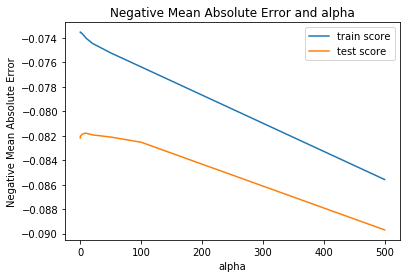

In [72]:
# Plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [73]:
# Getting the best estimator for lambda
ridge_regressor.best_estimator_

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
# Checking the coefficient values with lambda = 10
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01402779,  0.02392049,  0.07754194,  0.04956916,  0.02535262,
       -0.00688785,  0.05296902,  0.04245811,  0.05660375,  0.06259845,
        0.01248935,  0.03144225,  0.01251597, -0.06128789, -0.00847498,
        0.01475753,  0.01267603,  0.01436206,  0.01770552,  0.01542236,
       -0.01162635,  0.00881419,  0.0181291 ,  0.05198287,  0.02137325,
        0.07107134,  0.05093292,  0.02035707, -0.00979798,  0.00783715,
        0.02359803, -0.01025957,  0.01567778, -0.0186181 ,  0.02189405,
        0.01093614,  0.00884186,  0.0198177 ,  0.00637617,  0.00852157,
        0.00996531,  0.02163693,  0.01067251,  0.00731195,  0.02913744,
        0.00664687,  0.03636257,  0.00396494,  0.0157603 ,  0.03678272])

In [75]:
# Checking the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.015144076085184862

In [76]:
# Mapping the Features and coefficient in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
# Sorting the dataframe based on coefficient value
ridge_df = ridge_df.sort_values(by=['Coefficient'], ascending=False)
ridge_df

,Features,Coefficient
2,OverallQual,0.0775
25,MSZoning_RL,0.0711
9,GrLivArea,0.0626
8,2ndFlrSF,0.0566
6,TotalBsmtSF,0.0530
23,MSZoning_FV,0.0520
26,MSZoning_RM,0.0509
3,OverallCond,0.0496
7,1stFlrSF,0.0425
49,GarageType_Detchd,0.0368


In [77]:
# Fetching top 10 features
ridgeDFTop10 = ridge_df.head(10)
ridgeDFTop10

,Features,Coefficient
2,OverallQual,0.0775
25,MSZoning_RL,0.0711
9,GrLivArea,0.0626
8,2ndFlrSF,0.0566
6,TotalBsmtSF,0.0530
23,MSZoning_FV,0.0520
26,MSZoning_RM,0.0509
3,OverallCond,0.0496
7,1stFlrSF,0.0425
49,GarageType_Detchd,0.0368


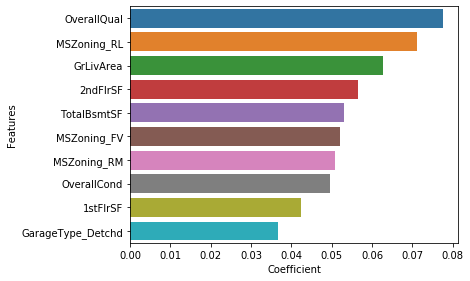

In [78]:
# Bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = ridgeDFTop10)
plt.show()

In [79]:
# Checking the coefficient values with lambda = 20 i.e. doubling the value for subjective question #1
alphaDoubled = 20
ridgeNew = Ridge(alpha=alphaDoubled)
ridgeNew.fit(X_train, y_train)
ridgeNew.coef_

array([-0.01429134,  0.02341071,  0.07765582,  0.04925436,  0.027223  ,
       -0.00490963,  0.05113531,  0.04031679,  0.05344882,  0.06471206,
        0.01253501,  0.03126804,  0.01259022, -0.06014225, -0.00913568,
        0.01434197,  0.01270877,  0.01515042,  0.0180672 ,  0.0156938 ,
       -0.01109701,  0.00929013,  0.01890712,  0.0424721 ,  0.01619237,
        0.05285109,  0.03442013,  0.02016726, -0.009663  ,  0.00766619,
        0.0230636 , -0.01015866,  0.01538132, -0.01840509,  0.02140423,
        0.01013053,  0.00781058,  0.01805032,  0.00566628,  0.00804757,
        0.0096253 ,  0.01988063,  0.00935814,  0.00632344,  0.02824271,
        0.00598883,  0.02693845,  0.00121546,  0.01123637,  0.02737089])

In [80]:
# Mapping the Features and coefficient in a dataframe for subjective question #1
ridgeNew_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridgeNew.coef_.round(4)})
ridgeNew_df.reset_index(drop=True, inplace=True)
ridgeNew_df = ridgeNew_df.sort_values(by=['Coefficient'], ascending=False)
ridgeNew_df

,Features,Coefficient
2,OverallQual,0.0777
9,GrLivArea,0.0647
8,2ndFlrSF,0.0534
25,MSZoning_RL,0.0529
6,TotalBsmtSF,0.0511
3,OverallCond,0.0493
23,MSZoning_FV,0.0425
7,1stFlrSF,0.0403
26,MSZoning_RM,0.0344
11,GarageCars,0.0313


### Lasso Regression

In [81]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
lasso_Regressor = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

lasso_Regressor.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
# Displaying the mean scores
lasso_cv_results = pd.DataFrame(lasso_Regressor.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.073581,-0.082159,1
1,0.0002,-0.073669,-0.082246,2
2,0.0003,-0.073793,-0.082340,3
3,0.0004,-0.073958,-0.082438,4
4,0.0005,-0.074143,-0.082573,5
8,0.004,-0.077249,-0.082749,6
7,0.003,-0.076669,-0.082766,7
6,0.002,-0.076201,-0.082921,8
5,0.001,-0.075171,-0.082950,9
9,0.005,-0.078023,-0.082957,10


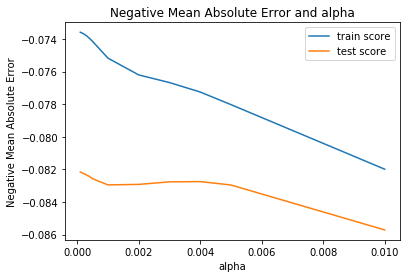

In [83]:
# Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [84]:
# Get the best estimator for lambda
lasso_Regressor.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
# check the coefficient values with lambda = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01302605,  0.02455675,  0.07702769,  0.04934594,  0.02307917,
       -0.00905121,  0.05540597,  0.04824422,  0.06475459,  0.05495562,
        0.01231342,  0.0321872 ,  0.01245396, -0.06167114, -0.00800353,
        0.01538911,  0.01255511,  0.01346497,  0.01730452,  0.01526634,
       -0.01250286,  0.00780273,  0.01674691,  0.06888336,  0.03037847,
        0.10383217,  0.0800198 ,  0.02035905, -0.00974875,  0.00775978,
        0.02405033, -0.01047944,  0.01588932, -0.01893517,  0.0219568 ,
        0.01123546,  0.00892556,  0.02095228,  0.00685678,  0.00847373,
        0.00990495,  0.02230538,  0.01117037,  0.00822359,  0.02968557,
        0.00753973,  0.05079673,  0.00811894,  0.02270685,  0.05081248])

In [86]:
# Checking the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.015141410321636344

In [87]:
# MApping the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df

,Features,Coefficient
25,MSZoning_RL,0.1038
26,MSZoning_RM,0.0800
2,OverallQual,0.0770
23,MSZoning_FV,0.0689
8,2ndFlrSF,0.0648
6,TotalBsmtSF,0.0554
9,GrLivArea,0.0550
46,GarageType_Attchd,0.0508
49,GarageType_Detchd,0.0508
3,OverallCond,0.0493


In [88]:
# Fetchign Top 10 features
lassoTop10_df = lasso_df.head(10)
lassoTop10_df

,Features,Coefficient
25,MSZoning_RL,0.1038
26,MSZoning_RM,0.0800
2,OverallQual,0.0770
23,MSZoning_FV,0.0689
8,2ndFlrSF,0.0648
6,TotalBsmtSF,0.0554
9,GrLivArea,0.0550
46,GarageType_Attchd,0.0508
49,GarageType_Detchd,0.0508
3,OverallCond,0.0493


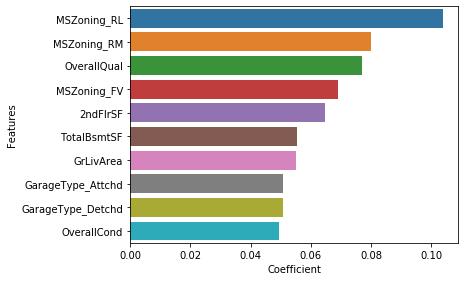

In [89]:
# bar plot to determine the variables that would affect pricing most using lasso regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = lassoTop10_df)
plt.show()

In [92]:
# Checking the coefficient values with lambda = 0.0002 i.e. doubling the value of alpha for subjective question #1
alphaNew = 0.0002
lassoDoubled = Lasso(alpha=alphaNew)       
lassoDoubled.fit(X_train, y_train) 
lassoDoubled.coef_

array([-0.01305602,  0.02420387,  0.07750361,  0.04979686,  0.02409935,
       -0.0080434 ,  0.05475067,  0.04386935,  0.05952629,  0.06067924,
        0.0122577 ,  0.03193247,  0.01239454, -0.06262351, -0.00791901,
        0.01522433,  0.01234023,  0.01343812,  0.01737484,  0.01522543,
       -0.01235075,  0.00769848,  0.01708884,  0.06500737,  0.02815613,
        0.09659796,  0.07325056,  0.02020283, -0.0094016 ,  0.00756895,
        0.02367549, -0.01016635,  0.01567154, -0.01886953,  0.02146762,
        0.01032346,  0.00754893,  0.01936827,  0.00600365,  0.00796676,
        0.00955508,  0.0203754 ,  0.0099334 ,  0.00725773,  0.02869015,
        0.00716524,  0.04409584,  0.00624488,  0.0193462 ,  0.04445889])

In [91]:
# Mapping the shortlisted Features and coefficient in a dataframe for subjective question #1
lassoNew_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lassoDoubled.coef_.round(4)})
lassoNew_df = lassoNew_df[lassoNew_df['Coefficient'] != 0.00]
lassoNew_df.reset_index(drop=True, inplace=True)
lassoNew_df = lassoNew_df.sort_values(by=['Coefficient'], ascending=False)
lassoNew_df

,Features,Coefficient
25,MSZoning_RL,0.0966
2,OverallQual,0.0775
26,MSZoning_RM,0.0733
23,MSZoning_FV,0.0650
9,GrLivArea,0.0607
8,2ndFlrSF,0.0595
6,TotalBsmtSF,0.0548
3,OverallCond,0.0498
49,GarageType_Detchd,0.0445
46,GarageType_Attchd,0.0441


## Conclusion 

* The optimal lambda value as per Ridge and Lasso regression is as below:
**Ridge - 10, 
  Lasso - 0.0001**

* The Mean Squared Error in case of Ridge and Lasso are:
**Ridge - 0.015144, 
  Lasso - 0.015141**
* The Mean Squared Error is slightly lower for Lasso regression as compared to Ridge regression.
 
* Hence, features predicted by Lasso regression model are best suited to predict the price of a house.
* These features are:
    1. MSZoning_RL - Zoning Classification of the sale (Residential Low Density)
    2. MSZoning_RM - Zoning Classification of the sale (Residential Medium Density)
    3. OverallQual - Overall material and finish of the house
    4. GrLivArea - Ground living area square feet
    5. MSZoning_FV - Zoning Classification of the sale (Floating Village Residential)
    6. GarageType_Attchd - Garage location (Attached to home)
    7. TotalBsmtSF - Total square feet of basement area
    8. GarageType_Detchd - Garage location (Detached from home)
    9. OverallCond - Overall condition of the house
    10. 2ndFlrSF - Second floor square feet